## 📌 Exploracion de datos de deteccion de objetos (VEDAI)
El dataset VEDAI dispone de anotaciones de instancias en bandas RGB y NIR, lo que lo hace util para explorar el espacio n-dimensional generado por multiples bandas.
- Primeramemte se veran 2 ejemplos de las imagenes contenidas en el dataset  y sus anotaciones.

In [1]:
#librerias por usar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os

In [2]:
#Rutas de interes
r_folder = r"dataset_VEDAI"
r_annotations = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\dataset_VEDAI\Annotations1024"
r_images = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\dataset_VEDAI\Vehicules1024"


In [3]:
#leer archivos y el nombre del primer archivo
archivos_annotations = os.listdir(r_annotations)
archivos_images = os.listdir(r_images)
print("La primera anotacion se llama: ", archivos_annotations[0])
print("La primera imagen se llama: ","RGB:",archivos_images[0]," y ","NIR:", archivos_images[1])



La primera anotacion se llama:  00000000.txt
La primera imagen se llama:  RGB: 00000000_co.png  y  NIR: 00000000_ir.png


Cada imgen le corresponde una anotacion, es importante mencionar las imagenes vienen dadas en pares, observando la salida anterior, cada umagen viene dada por un codigo numerico seguido de "_co" para RGB y "_ir" para banda NIR.

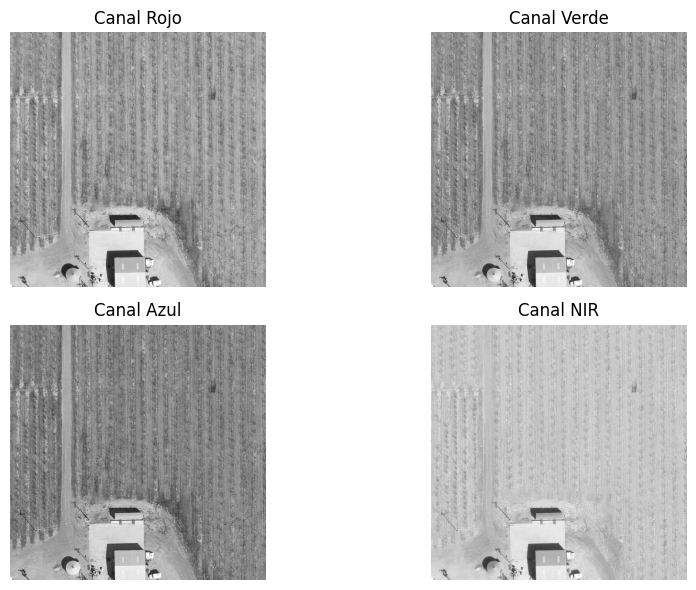

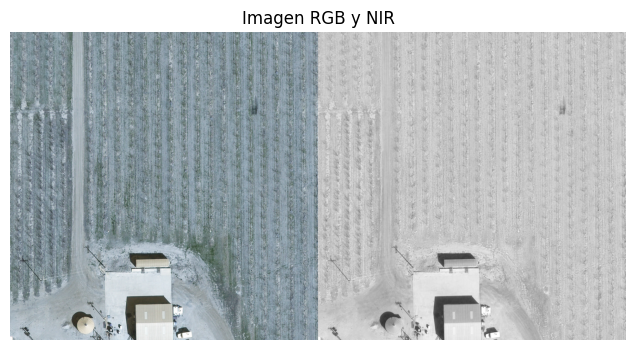

In [4]:
# Rutas completas a las dos primeras imágenes
ruta_img1 = os.path.join(r_images, archivos_images[0])
ruta_img2 = os.path.join(r_images, archivos_images[1])

# Leer imágenes
img_rgb1 = cv2.imread(ruta_img1)
img_nir1 = cv2.imread(ruta_img2)

# Separar canales RGB
b, g, r = cv2.split(img_rgb1)

# Para mostrar correctamente con matplotlib (que espera RGB)
r = cv2.cvtColor(r, cv2.COLOR_GRAY2RGB)
g = cv2.cvtColor(g, cv2.COLOR_GRAY2RGB)
b = cv2.cvtColor(b, cv2.COLOR_GRAY2RGB)

# Convertir NIR a escala de grises si viene como BGR
nir_gray = cv2.cvtColor(img_nir1, cv2.COLOR_BGR2GRAY)
nir = cv2.cvtColor(nir_gray, cv2.COLOR_GRAY2RGB)

# Plotear los 4 canales
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(r)
plt.title("Canal Rojo")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(g)
plt.title("Canal Verde")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(b)
plt.title("Canal Azul")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(nir)
plt.title("Canal NIR")
plt.axis("off")

plt.tight_layout()
plt.show()

# Combinarlas lado a lado
import numpy as np
img_nir1 = cv2.resize(img_nir1, (img_rgb1.shape[1], img_rgb1.shape[0]))
combinada = np.hstack((img_rgb1, img_nir1))

# Ajustar el tamaño del plot (en pulgadas)
plt.figure(figsize=(8, 4))  # más pequeño que el default
plt.title("Imagen RGB y NIR")
plt.imshow(combinada)
plt.axis("off")
plt.show()


Ahora bien, es importante poder visualizar de que forma estan dadas las anotaciones, asi que visualizaremos las anotaciones de la primera imagen en sus 4 canales.

In [5]:
#leemos el txt de la primera imagen.
ruta_anotacion1 = os.path.join(r_annotations,archivos_annotations[0])
with open(ruta_anotacion1, "r") as f:
    lineas = f.readlines()
print(lineas)


['580.697942 1009.223279 3.012318 2 1 0 554 605 607 558 1004 996 1016 1021\n']


Como se interpretan estos numeros segun el formato? 580.697942 1009.223279 3.012318 2 1 0 554 605 607 558 1004 996 1016 1021
- 580.697942 1009.223279 -> centroide del objeto (x, y).
- 3.012318 -> ángulo de rotación del bounding box.
- 2 1 0 -> etiquetas de clase 
- 554 605 607 558 1004 996 1016 1021 ->  las 4 esquinas del polígono (x1, x2, x3, x4, y1, y2, y3, y4).


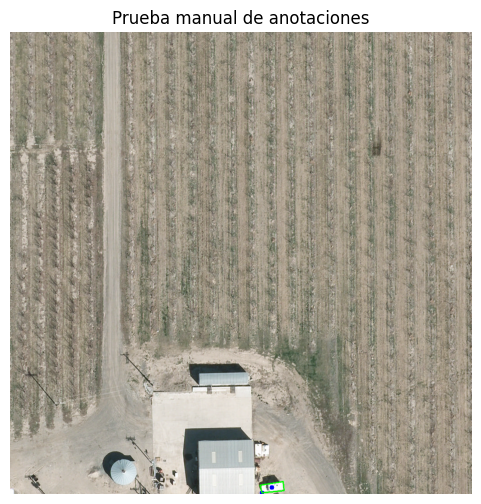

In [17]:

# Cargar la imagen original desde archivo (limpia siempre)
img_original = cv2.imread(r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\dataset_VEDAI\Vehicules1024\00000000_co.png")

# Crear copia para dibujar
img_dibujo = img_original.copy()

# Definir puntos manualmente
centroide = (580,1009)
pts = [(554, 1004),
        (605, 996), 
        (607, 1016),
          (558, 1021)]

# Dibujar puntos
for (x, y) in pts:
    cv2.circle(img_dibujo,centroide, 5, (255, 0, 0), -1)
cv2.circle(img_dibujo, (x, y), 5, (255, 0, 0), -1)
# Dibujar polígono
cv2.polylines(img_dibujo, [np.array(pts, dtype=np.int32)], isClosed=True, color=(0, 255, 0), thickness=2)

# Mostrar imagen
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img_dibujo, cv2.COLOR_BGR2RGB))
plt.title("Prueba manual de anotaciones")
plt.axis("off")
plt.show()


Ahora, se generara un codigo que segun la imagen seleccionada del dataset se obtendra un histograma para cada canal trabajado.


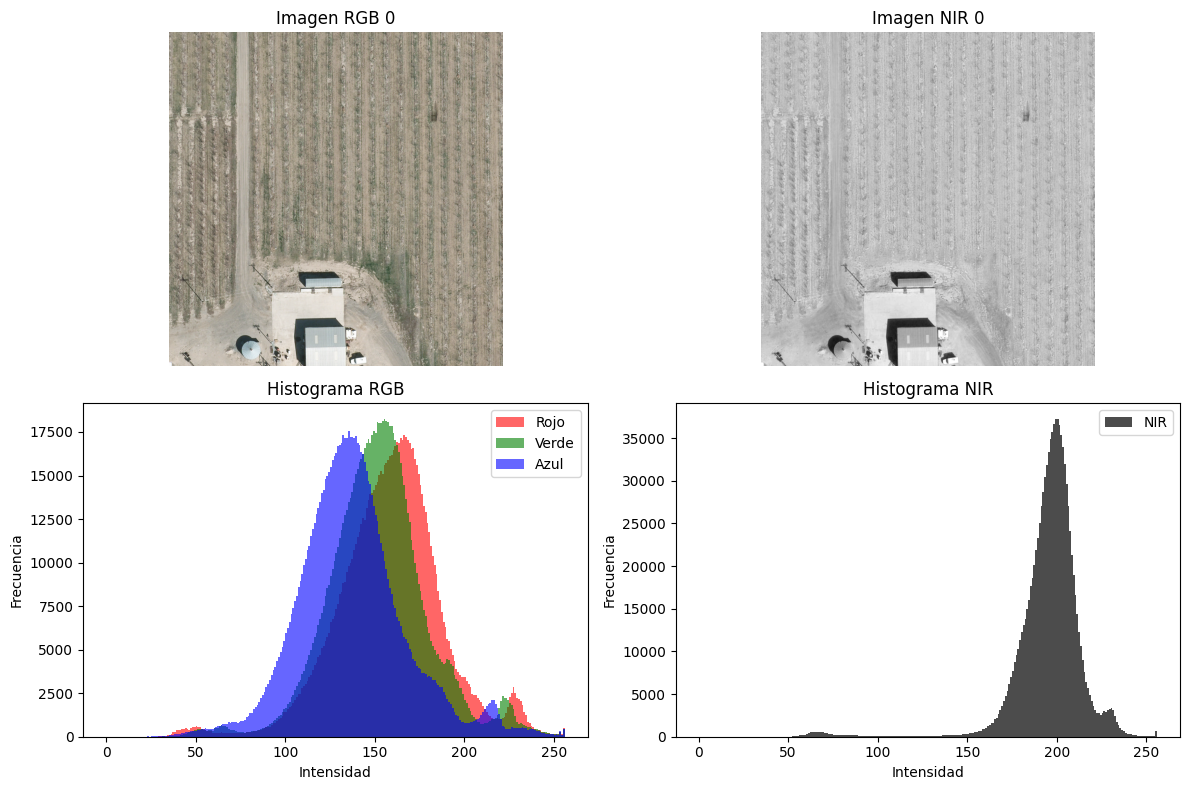

In [7]:

# Ruta a la carpeta donde están tus imágenes
carpeta = "E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\dataset_VEDAI\Vehicules1024"

# Obtener lista ordenada de archivos
archivos = sorted(os.listdir(carpeta))

# Variable para elegir qué imagen graficar
imagen_para_plotear = 0  # empieza desde 0

# Calcular índices de la pareja
indice_co = imagen_para_plotear * 2     # canal RGB
indice_ir = imagen_para_plotear * 2 + 1 # canal IR

# Leer imágenes
img_co = cv2.imread(os.path.join(carpeta, archivos[indice_co]))
img_ir = cv2.imread(os.path.join(carpeta, archivos[indice_ir]), cv2.IMREAD_GRAYSCALE)

# Convertir BGR a RGB para matplotlib
img_co_rgb = cv2.cvtColor(img_co, cv2.COLOR_BGR2RGB)

# Separar canales RGB
b, g, r = cv2.split(img_co)

# --- Plot ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Mostrar imagen RGB
axes[0, 0].imshow(img_co_rgb)
axes[0, 0].set_title(f"Imagen RGB {imagen_para_plotear}")
axes[0, 0].axis("off")

# Mostrar imagen NIR
axes[0, 1].imshow(img_ir, cmap="gray")
axes[0, 1].set_title(f"Imagen NIR {imagen_para_plotear}")
axes[0, 1].axis("off")

# Histograma RGB
axes[1, 0].hist(r.ravel(), 256, [0, 256], color='r', alpha=0.6, label="Rojo")
axes[1, 0].hist(g.ravel(), 256, [0, 256], color='g', alpha=0.6, label="Verde")
axes[1, 0].hist(b.ravel(), 256, [0, 256], color='b', alpha=0.6, label="Azul")
axes[1, 0].set_title("Histograma RGB")
axes[1, 0].set_xlabel("Intensidad")
axes[1, 0].set_ylabel("Frecuencia")
axes[1, 0].legend()

# Histograma NIR
axes[1, 1].hist(img_ir.ravel(), 256, [0, 256], color='k', alpha=0.7, label="NIR")
axes[1, 1].set_title("Histograma NIR")
axes[1, 1].set_xlabel("Intensidad")
axes[1, 1].set_ylabel("Frecuencia")
axes[1, 1].legend()

plt.tight_layout()
plt.show()




Es util poder visualizar un histograma de las imagenes en conjunto. De forma que se podrian observar caracteristicas generales del dataset.

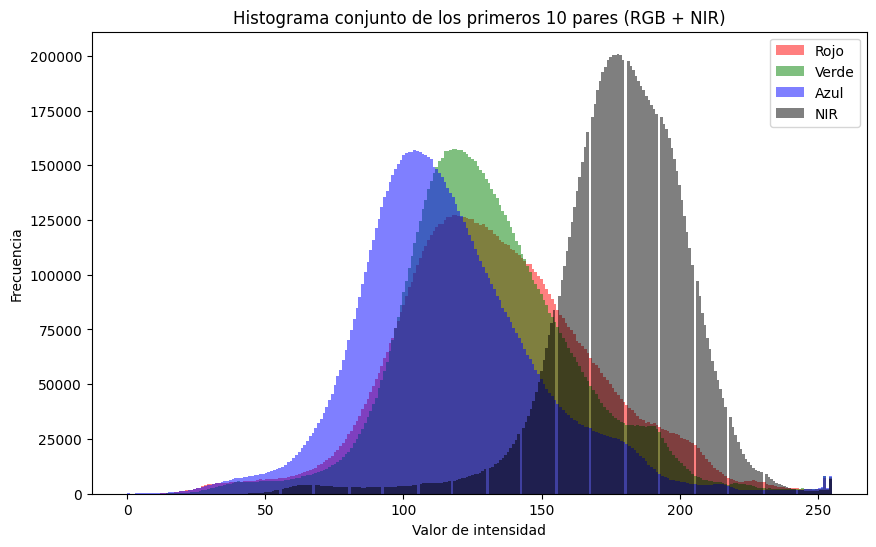

In [8]:
#ACOMULA PIXELES Y LUEGO LOS GRAFICA, ES COMPUTACIONALMENTE MUY LENTO
# Carpeta de imágenes
carpeta = "E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\dataset_VEDAI\Vehicules1024"

# Variable que indica cuántos pares de imágenes (RGB+NIR) se van a procesar
num_pares = 10  # procesa los primeros 10 pares

# Obtener lista de archivos ordenados
archivos = sorted(os.listdir(carpeta))

# Limitar a los primeros pares (cada par tiene 2 imágenes)
archivos = archivos[:num_pares * 2]

# Listas para acumular los valores de píxeles
valores_r, valores_g, valores_b, valores_nir = [], [], [], []

# Recorrer archivos según su posición
for idx, archivo in enumerate(archivos):
    ruta = os.path.join(carpeta, archivo)
    img = cv2.imread(ruta, cv2.IMREAD_UNCHANGED)

    if img is None:
        continue

    if idx % 2 == 0:  # Imagen RGB
        b, g, r = cv2.split(img)
        valores_r.extend(r.flatten())
        valores_g.extend(g.flatten())
        valores_b.extend(b.flatten())
    else:  # Imagen NIR
        valores_nir.extend(img.flatten())

# Graficar histograma conjunto
plt.figure(figsize=(10, 6))
plt.hist(valores_r, bins=256, color='r', alpha=0.5, label='Rojo')
plt.hist(valores_g, bins=256, color='g', alpha=0.5, label='Verde')
plt.hist(valores_b, bins=256, color='b', alpha=0.5, label='Azul')
plt.hist(valores_nir, bins=256, color='k', alpha=0.5, label='NIR')

plt.title(f"Histograma conjunto de los primeros {num_pares} pares (RGB + NIR)")
plt.xlabel("Valor de intensidad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


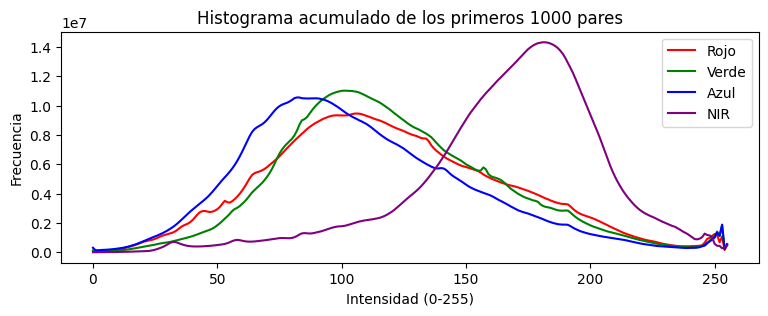

In [29]:

# Número de pares a procesar
num_pares = 1000

# Listar imágenes en orden
imagenes = sorted(os.listdir(carpeta))

# Inicializar histogramas acumulados
hist_r = np.zeros((256,), dtype=np.float32)
hist_g = np.zeros((256,), dtype=np.float32)
hist_b = np.zeros((256,), dtype=np.float32)
hist_nir = np.zeros((256,), dtype=np.float32)

# Procesar solo los primeros num_pares pares
for i in range(num_pares):
    idx_rgb = 2 * i      # imagen RGB
    idx_nir = 2 * i + 1  # imagen NIR
    
    # Leer imágenes
    img_rgb = cv2.imread(os.path.join(carpeta, imagenes[idx_rgb]))
    img_nir = cv2.imread(os.path.join(carpeta, imagenes[idx_nir]), cv2.IMREAD_GRAYSCALE)
    
    # Calcular histogramas (cv2 los devuelve como matrices 256x1)
    hist_b += cv2.calcHist([img_rgb], [0], None, [256], [0, 256]).flatten()
    hist_g += cv2.calcHist([img_rgb], [1], None, [256], [0, 256]).flatten()
    hist_r += cv2.calcHist([img_rgb], [2], None, [256], [0, 256]).flatten()
    hist_nir += cv2.calcHist([img_nir], [0], None, [256], [0, 256]).flatten()

# Graficar histogramas acumulados
plt.figure(figsize=(9,3))
plt.plot(hist_r, color='red', label="Rojo")
plt.plot(hist_g, color='green', label="Verde")
plt.plot(hist_b, color='blue', label="Azul")
plt.plot(hist_nir, color='purple', label="NIR")
plt.title(f"Histograma acumulado de los primeros {num_pares} pares")
plt.xlabel("Intensidad (0-255)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


De la distribucion de histograma de los primeros 200 pares podemos concluir varias cosas:
- La distribucion de intensidades de los canales RGB esbastante similar, esto puede indicar un dataset con rango dinamico ya corregido para mejor visualizacion de la informacion
- El pico que se observa en el NIR esta indicando una mayor reflectancia que en el visible, se podria hipotetizar que se debe a la presencia de vegetacion en las imagenes.
- Mientras que RGB se concentra en el rango 80–150, el NIR está mucho más cargado hacia 170–200, esto significa que los objetos que aparecen en la escena tienen un comportamiento espectral distinto en visible y en NIR.

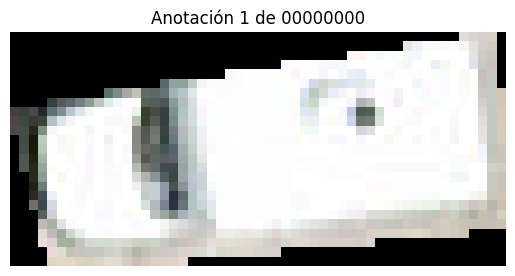

In [36]:
def visualizar_anotacion(annotations_folder, images_folder, index):
    """
    Visualiza los recortes de las anotaciones (bounding boxes) 
    para un índice dado de imagen.

    Params:
        annotations_folder: ruta a la carpeta de anotaciones (.txt)
        images_folder: ruta a la carpeta de imágenes (.png)
        index: número de la imagen (ej. 0 -> '00000000.txt')
    """
    # --- Buscar archivos ---
    base_name = f"{index:08d}"  # formato con ceros a la izquierda
    txt_path = os.path.join(annotations_folder, f"{base_name}.txt")
    img_path = os.path.join(images_folder, f"{base_name}_co.png")  # tomo la RGB

    if not os.path.exists(txt_path):
        raise FileNotFoundError(f"No existe anotación: {txt_path}")
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"No existe imagen: {img_path}")

    # --- Leer imagen ---
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # --- Leer anotaciones ---
    with open(txt_path, "r") as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        parts = line.strip().split()
        if len(parts) < 11:
            continue  # línea inválida

        # Polígono de 4 esquinas
        xs = list(map(int, parts[6:10]))   # x1, x2, x3, x4
        ys = list(map(int, parts[10:14]))  # y1, y2, y3, y4
        polygon = np.array(list(zip(xs, ys)), dtype=np.int32)

        # Crear máscara para recortar el polígono
        mask = np.zeros(img.shape[:2], dtype=np.uint8)
        cv2.fillPoly(mask, [polygon], 255)

        # Aplicar la máscara
        recorte = cv2.bitwise_and(img, img, mask=mask)

        # Recortar el bounding box del polígono
        x_min, x_max = min(xs), max(xs)
        y_min, y_max = min(ys), max(ys)
        recorte_cuadro = recorte[y_min:y_max, x_min:x_max]

        # Mostrar resultado
        plt.figure()
        plt.imshow(recorte_cuadro)
        plt.title(f"Anotación {i+1} de {base_name}")
        plt.axis("off")
        plt.show()


# --------- USO ---------
annotations_folder = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\dataset_VEDAI\Annotations1024"
images_folder = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\dataset_VEDAI\Vehicules1024"

visualizar_anotacion(annotations_folder, images_folder, index=0)  # prueba con la primera imagen
 # prueba con el primer par


In [ ]:

# Opcional: si tienes un mapeo id->nombre, ponlo aquí. Si no, usará "cls_{id}"
CLASS_MAP = {
    # 1: "car",
    # 2: "truck",
    # 3: "tractor",
    # 4: "bus",
    # 5: "boat",
    # ...
}

def visualizar_anotacion(annotations_folder, images_folder, output_folder, index):
    """
    Visualiza los recortes de las anotaciones (polígonos) para un índice dado
    y guarda cada recorte en una carpeta por clase.

    annotations_folder: carpeta con .txt (00000000.txt, ...)
    images_folder: carpeta con imágenes (00000000_co.png, 00000000_ir.png, ...)
    output_folder: carpeta raíz donde se guardarán los recortes clasificados
    index: número de imagen (ej. 0 -> '00000000.txt')
    """
    base_name = f"{index:08d}"
    txt_path = os.path.join(annotations_folder, f"{base_name}.txt")
    img_path = os.path.join(images_folder, f"{base_name}_co.png")  # usamos la RGB

    if not os.path.exists(txt_path):
        raise FileNotFoundError(f"No existe anotación: {txt_path}")
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"No existe imagen: {img_path}")

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    H, W = img.shape[:2]

    with open(txt_path, "r") as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        parts = line.strip().split()
        if len(parts) < 14:
            continue  # línea inválida

        # -------- clase (¡ojo: viene en parts[3]!) --------
        try:
            cls_id = int(float(parts[3]))
        except ValueError:
            # si viniera algo raro, lo metemos como texto
            cls_id = str(parts[3])

        class_name = CLASS_MAP.get(cls_id, f"cls_{cls_id}")

        # -------- polígono --------
        # pueden venir floats, los redondeamos
        xs = [int(round(float(v))) for v in parts[6:10]]   # x1..x4
        ys = [int(round(float(v))) for v in parts[10:14]]  # y1..y4
        polygon = np.array(list(zip(xs, ys)), dtype=np.int32)

        # máscara y recorte
        mask = np.zeros((H, W), dtype=np.uint8)
        cv2.fillPoly(mask, [polygon], 255)
        recorte = cv2.bitwise_and(img, img, mask=mask)

        # bounding rect del polígono con límites de imagen
        x_min, x_max = max(0, min(xs)), min(W, max(xs))
        y_min, y_max = max(0, min(ys)), min(H, max(ys))
        if x_max <= x_min or y_max <= y_min:
            continue  # bbox degenerado

        recorte_cuadro = recorte[y_min:y_max, x_min:x_max]

        # -------- guardar por clase --------
        save_dir = os.path.join(output_folder, class_name)
        os.makedirs(save_dir, exist_ok=True)
        save_path = os.path.join(save_dir, f"{base_name}_{i+1}.png")
        cv2.imwrite(save_path, cv2.cvtColor(recorte_cuadro, cv2.COLOR_RGB2BGR))
        #print(f"✅ Guardado: {save_path}")

        # Mostrar (opcional)
        #plt.figure()
        #plt.imshow(recorte_cuadro)
        #plt.title(f"{class_name} - Anotación {i+1} de {base_name}")
        #plt.axis("off")
        #plt.show()


# --------- USO ---------
annotations_folder = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\dataset_VEDAI\Annotations1024"
images_folder      = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\dataset_VEDAI\Vehicules1024"
output_folder      = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\recortes_clasificados"

visualizar_anotacion(annotations_folder, images_folder, output_folder, index=10)


# --------- USO ---------
annotations_folder = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\dataset_VEDAI\Annotations1024"
images_folder = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\dataset_VEDAI\Vehicules1024"
output_folder = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\data_exploration\outputs\output_dataset_por_clases"

visualizar_anotacion(annotations_folder, images_folder, output_folder, index=1)


Operamos sobre un ciclo for para guardar cada clase  clasificada por carpeta

In [ ]:

annotations_folder = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\dataset_VEDAI\Annotations1024"
images_folder = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\dataset_VEDAI\Vehicules1024"
output_folder = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\data_exploration\outputs\output_dataset_por_clases"


inicio = 0
fin = 300   # o más grande si quieres

for i in range(inicio, fin):
    base_name = f"{i:08d}"  # mismo formato que tus nombres
    txt_path = os.path.join(annotations_folder, f"{base_name}.txt")

    if not os.path.exists(txt_path):
        print(f"Saltando {txt_path}, no existe.")
        continue

    visualizar_anotacion(
        annotations_folder, 
        images_folder, 
        output_folder,
        index=i,
    )


Ahora que tenemos cada clase definida en una carptea, podemos realizar un histograma  para cada clase independientemente.

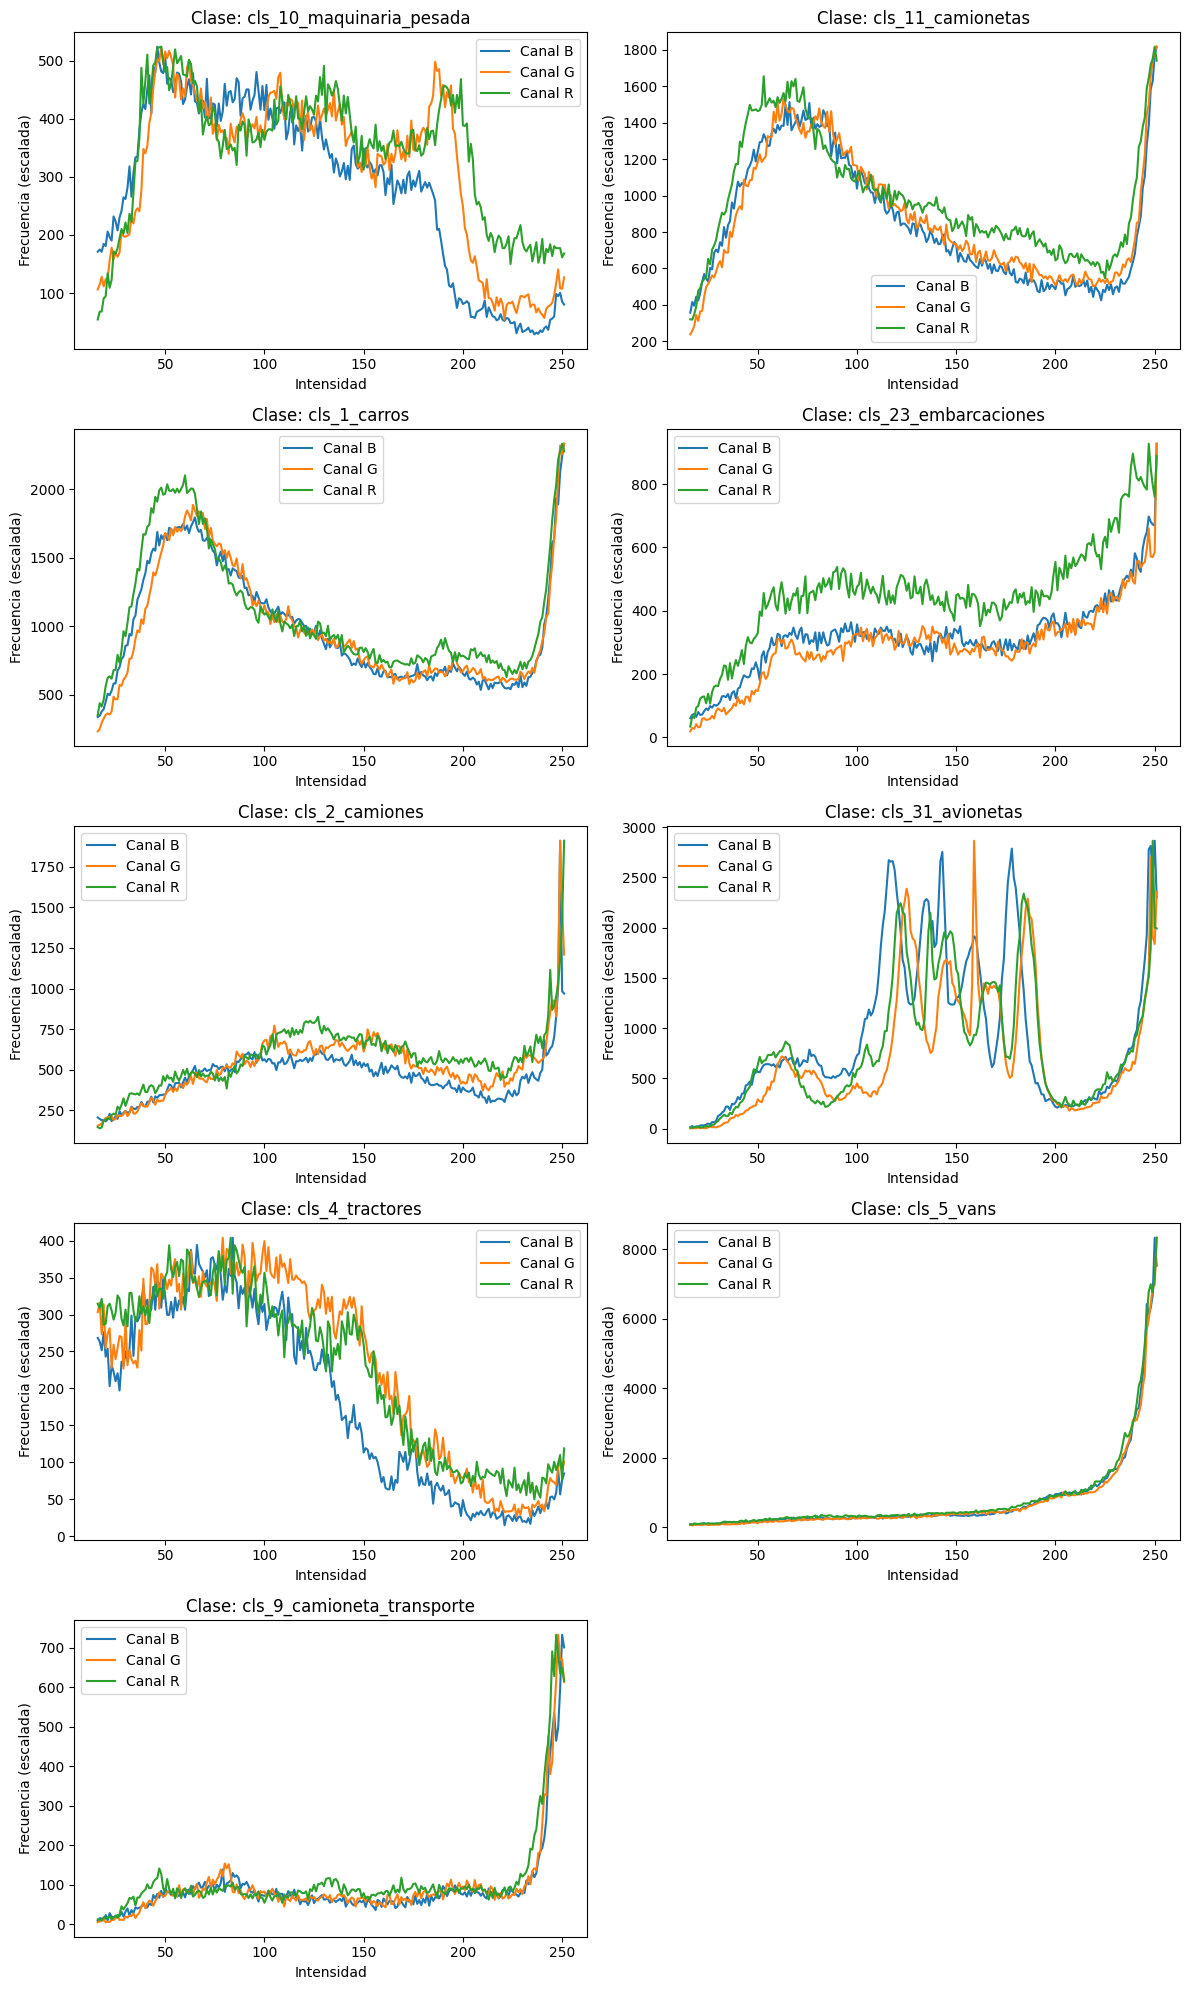

In [34]:

r_datasets_por_clase = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\data_exploration\outputs\output_dataset_por_clases"

# Función para generar histograma de una carpeta de imágenes
def generar_histograma_por_clase(carpeta_clase, nombre_clase):
    canales = ['B', 'G', 'R']  # si tus imágenes tienen 3 canales
    histogramas = {c: [] for c in canales}

    for archivo in os.listdir(carpeta_clase):
        ruta_img = os.path.join(carpeta_clase, archivo)
        if os.path.isfile(ruta_img):
            img = cv2.imread(ruta_img)

            if img is None:
                continue

            # Calcular histograma por cada canal
            for i, canal in enumerate(canales):
                hist = cv2.calcHist([img], [i], None, [256], [0, 256])
                # Eliminar intensidades entre 0-15 y 252-255
                hist[0:16] = 0
                hist[252:256] = 0
                histogramas[canal].append(hist)

    # Sumar histogramas de todas las imágenes por canal
    hist_totales = {}
    for canal in canales:
        if histogramas[canal]:
            hist_totales[canal] = sum(histogramas[canal])
    
    # Encontrar el segundo valor máximo entre todos los histogramas
    todos_valores = np.concatenate([h.flatten() for h in hist_totales.values()])
    valores_ordenados = np.sort(todos_valores)[::-1]  # descendente
    if len(valores_ordenados) > 1:
        segundo_max = valores_ordenados[1]
    else:
        segundo_max = valores_ordenados[0]  # si solo hay un valor, usarlo

    return hist_totales, segundo_max


# Recorremos cada carpeta (cada clase) y guardamos resultados
clases = []
resultados = {}
for clase in os.listdir(r_datasets_por_clase):
    carpeta_clase = os.path.join(r_datasets_por_clase, clase)
    if os.path.isdir(carpeta_clase):
        hist_totales, segundo_max = generar_histograma_por_clase(carpeta_clase, clase)
        if hist_totales:  # guardar solo si tiene datos
            clases.append(clase)
            resultados[clase] = (hist_totales, segundo_max)

# ---- Graficar todos en subplots ----
n_clases = len(clases)
n_cols = 2  # puedes cambiar a 3 o 4 si quieres más compacto
n_rows = int(np.ceil(n_clases / n_cols))

plt.figure(figsize=(12, 4 * n_rows))

for idx, clase in enumerate(clases, 1):
    hist_totales, segundo_max = resultados[clase]

    plt.subplot(n_rows, n_cols, idx)
    for canal, hist_total in hist_totales.items():
        if segundo_max > 0:
            hist_escalado = hist_total * (segundo_max / hist_total.max())
        else:
            hist_escalado = hist_total
        plt.plot(range(16, 252), hist_escalado[16:252], label=f'Canal {canal}')

    plt.title(f"Clase: {clase}")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia (escalada)")
    plt.legend()

plt.tight_layout()
plt.show()


El pico en el 0 indica los pixeles de relleno por el metodo de recorte, por lo que puede ser ignorado y se puede analizar el resto del histograma.

Ahora bien, con fin de continuar con los fines exploratorios, se generara una transformada de fourier para cada una de las clases con el fin de visualizar sus componentes.

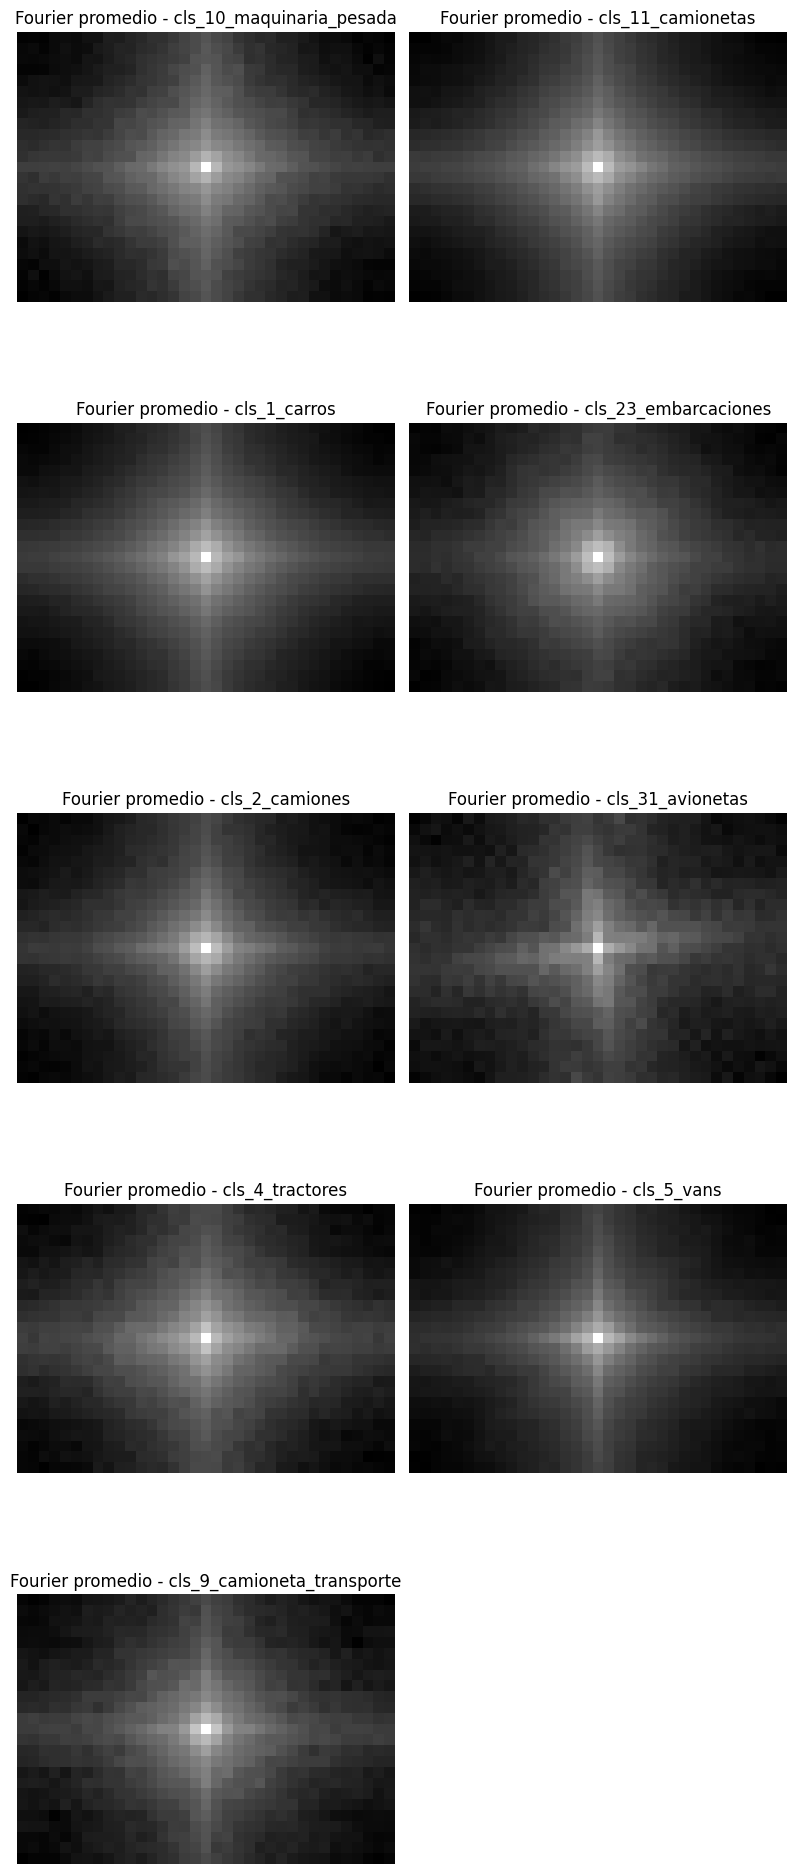

In [33]:
# Ruta a las carpetas por clases
r_datasets_por_clase = r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\data_exploration\outputs\output_dataset_por_clases"

# --- Obtener resolución de referencia de la imagen ejemplo ---
img_ref = cv2.imread(
    r"E:\MACHINE LEARNING\AVANZADO 1\VSFOLDER A1 PROYECT\OT-Detecci-n-de-objetos-VIS-NIR-ML-Colombia\data_exploration\outputs\output_dataset_por_clases\cls_1_carros\00000006_1.png",
    cv2.IMREAD_GRAYSCALE
)
ref_shape = img_ref.shape  # (alto, ancho)

def analizar_frecuencia_por_clase(dataset_path, ref_shape, umbral=10):
    clases = os.listdir(dataset_path)
    resultados = {}

    for clase in clases:
        clase_path = os.path.join(dataset_path, clase)
        if not os.path.isdir(clase_path):
            continue

        espectros = []
        for img_name in os.listdir(clase_path):
            img_path = os.path.join(clase_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            # Redimensionar a tamaño de referencia
            img_resized = cv2.resize(img, (ref_shape[1], ref_shape[0]))

            # Borrar píxeles de baja intensidad (relleno negro)
            _, img_clean = cv2.threshold(img_resized, umbral, 255, cv2.THRESH_TOZERO)

            # FFT
            f = np.fft.fft2(img_clean)
            fshift = np.fft.fftshift(f)
            magnitude_spectrum = 20 * np.log1p(np.abs(fshift))

            espectros.append(magnitude_spectrum)

        if espectros:
            # Promedio espectros
            espectro_promedio = np.mean(espectros, axis=0)
            resultados[clase] = espectro_promedio

    # ---- Graficar todos en subplots ----
    n_clases = len(resultados)
    n_cols = 2  # cambia a 3 o 4 si quieres más compacto
    n_rows = int(np.ceil(n_clases / n_cols))

    plt.figure(figsize=(8, 4 * n_rows))

    for idx, (clase, espectro) in enumerate(resultados.items(), 1):
        plt.subplot(n_rows, n_cols, idx)
        plt.imshow(espectro, cmap="gray")
        plt.title(f"Fourier promedio - {clase}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


analizar_frecuencia_por_clase(r_datasets_por_clase, ref_shape)
